### Task
1. Generate a data set of size 100 as directed by the exercise, and plot the examples {(x n , y n )} as well as the target function f on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot. Generate a test set of size 1000 of the same nature.

2. Next, implement the pocket algorithm and run it on the data set for 1000 updates. Record Ein(w(t)), Ein(w∗(t)), Eout(w(t)), and Eout(w∗(t)) as functions of t (where E out is estimated by the test set). Repeat the experiment for 20 times. Plot the average Ein(w(t)) and Ein(w∗(t)) as functions of t and briefly state your findings.

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Let's the target function be a random linear function of my choice
# 0.7x0 + 0.8x1 + 0.4x2, where x0 = 1

target_weights = np.array([0.7, 0.8, 0.4])

# This function will be used to plot the target function
def target_function(x1):
    x2 = -(target_weights[0]*1 + target_weights[1]*x1)/target_weights[2]
    return x2

# This function will be used to calculate labels, and distinguish positive and negative points
def target_function_activate(X):
    if np.dot(target_weights, X) < 0:
        return -1
    else:
        return 1

In [53]:
# Data set X_in with size 100

# Generate a random data set of size 100
X_in = np.random.uniform(low=-1.0, high=1.0, size=(100,3))
for x in X_in:
    x[0] = 1.0

# Distinguish between positive and negative examples, and identify labels
X_inpos, X_inneg, Y_inpos, Y_inneg, labels_in = [],[],[],[],[]
for x in X_in:
    if target_function_activate(x) == 1:
        X_inpos.append(x[1])
        Y_inpos.append(x[2])
    else:
        X_inneg.append(x[1])
        Y_inneg.append(x[2])
    labels_in.append(target_function_activate(x))
    
# Add three noise points to data set
num_noise = 0
for i, x in enumerate(X_in):
    if target_function_activate(x) == 1:
        X_inpos.remove(x[1])
        Y_inpos.remove(x[2])
        X_inneg.append(x[1])
        Y_inneg.append(x[2])
        labels_in[i] = -1
        num_noise += 1
        if num_noise == 3:
            break

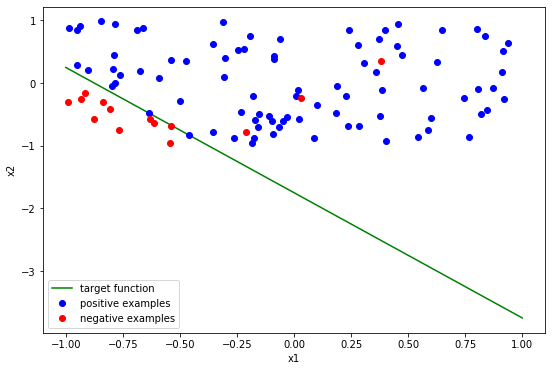

In [54]:
# Plot the data set X_in

plt.rcParams["figure.figsize"] = (9,6)

# Plot the target function
plt.plot([-1.0, 1.0], [target_function(i) for i in [-1.0, 1.0]], 'g', label = 'target function')

# Plot the X_in data set's points 
plt.plot(X_inpos, Y_inpos, 'bo', label = 'positive examples')
plt.plot(X_inneg, Y_inneg, 'ro', label = 'negative examples')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [55]:
# Test data set X_test with size 1000

# Generate a random data set of size 1000
X_test = np.random.uniform(low=-1.0, high=1.0, size=(1000,3))
for x in X_test:
    x[0] = 1.0

# Distinguish between positive and negative examples, and identify labels
X_testpos, X_testneg, Y_testpos, Y_testneg, labels_test = [],[],[],[],[]
for x in X_test:
    if target_function_activate(x) == 1:
        X_testpos.append(x[1])
        Y_testpos.append(x[2])
    else:
        X_testneg.append(x[1])
        Y_testneg.append(x[2])
    labels_test.append(target_function_activate(x))
    
# Add three noise points to data set
num_noise = 0
for i, x in enumerate(X_test):
    if target_function_activate(x) == 1:
        X_testpos.remove(x[1])
        Y_testpos.remove(x[2])
        X_testneg.append(x[1])
        Y_testneg.append(x[2])
        labels_test[i] = -1
        num_noise += 1
        if num_noise == 3:
            break

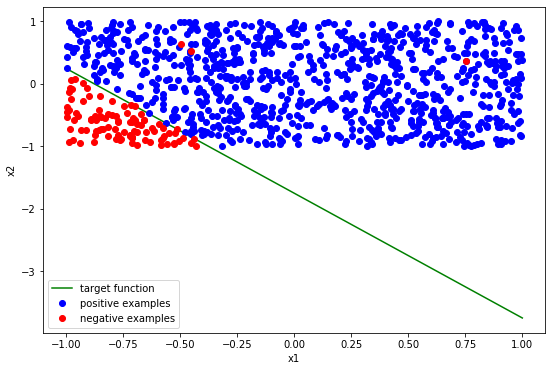

In [56]:
# Plot the data set X_test

plt.rcParams["figure.figsize"] = (9,6)

# Plot the target function
plt.plot([-1.0, 1.0], [target_function(i) for i in [-1.0, 1.0]], 'g', label = 'target function')

# Plot the test data set's points 
plt.plot(X_testpos, Y_testpos, 'bo', label = 'positive examples')
plt.plot(X_testneg, Y_testneg, 'ro', label = 'negative examples')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [57]:
# Initialize weights with zeros

def initialize_weights():
    weights = np.zeros((3,))
    return weights

In [58]:
# Pocket algorithm

def Pocket(X, W, Y, T = 1000):
    # X is an input data set
    # Y is labels for corresponding X
    # W is the weights
    # T is a number of iterations
    
    errors_w = []
    errors_w_star = []
    
    pocket = W
    error_old = 0
    for i, x in enumerate(X):
        z = np.dot(W, x)
        if z * Y[i] <= 0:
            error_old += 1

    
    for t in range(T):
        error_new = 0
        
        for i, x in enumerate(X):
            z = np.dot(W, x)
            if z * Y[i] <= 0:
                W = W + Y[i]*x 
                break
                
        for i, x in enumerate(X): 
            z = np.dot(W, x)
            if z * Y[i] <= 0:
                error_new += 1
        
        errors_w.append(error_new)
        if error_new < error_old:
            pocket = W
            error_old = error_new
        errors_w_star.append(error_old)
            
    return errors_w, errors_w_star

In [59]:
# Calculate errors for X_in

errors_w_in_mean = np.zeros((1000,))
errors_w_star_in_mean = np.zeros((1000,))

for i in range(20):
    # Initialize weights for the data set X_in
    W_in = initialize_weights()

    # Run Pocket on the data set X_in and store the errors
    errors_w_in, errors_w_star_in = Pocket(X_in, W_in, labels_in)  
    errors_w_in_mean += errors_w_in
    errors_w_star_in_mean += errors_w_star_in    
errors_w_in_mean /= 20
errors_w_star_in_mean /= 20

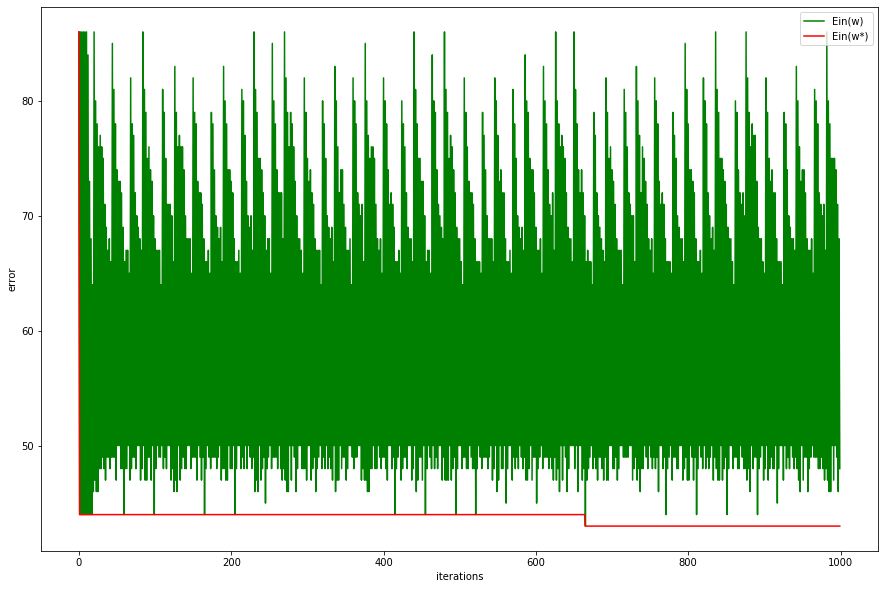

In [60]:
# Plot errors for X_in

plt.rcParams["figure.figsize"] = (15,10)

# Plot the errors Ein(w)
plt.plot(range(1000), errors_w_in_mean, 'g', label = 'Ein(w)')

# Plot the errors Ein(w*)
plt.plot(range(1000), errors_w_star_in_mean, 'r', label = 'Ein(w*)')

plt.xlabel('iterations')
plt.ylabel('error')
plt.legend()
plt.show()

In [61]:
# Calculate errors for X_test

errors_w_out_mean = np.zeros((1000,))
errors_w_star_out_mean = np.zeros((1000,))

for i in range(20):
    # Initialize weights for the data set X_test
    W_test = initialize_weights()

    # Run Pocket on the data set X_test and store the errors
    errors_w_out, errors_w_star_out = Pocket(X_test, W_test, labels_test)  
    errors_w_out_mean += errors_w_out
    errors_w_star_out_mean += errors_w_star_out    
errors_w_out_mean /= 20
errors_w_star_out_mean /= 20

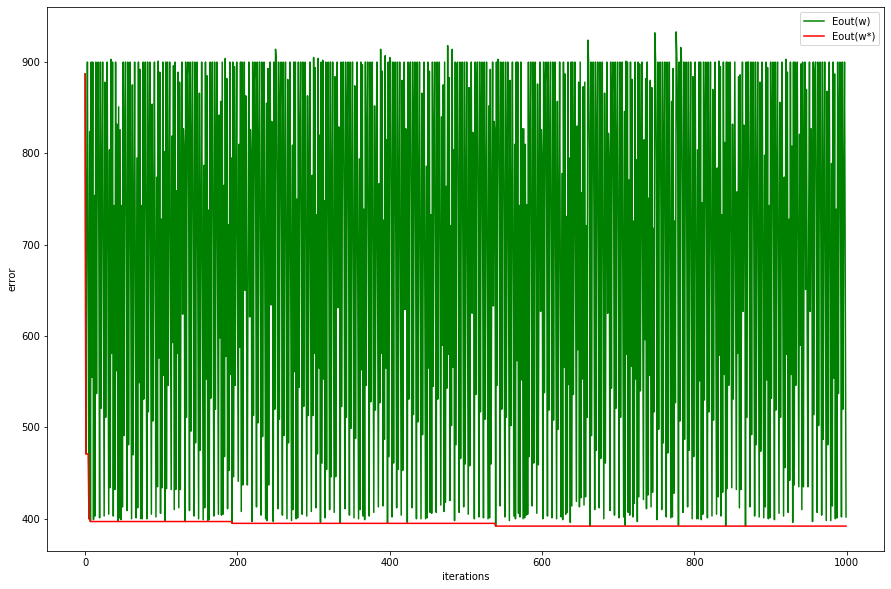

In [62]:
# Plot errors for X_test

plt.rcParams["figure.figsize"] = (15,10)

# Plot the errors Eout(w)
plt.plot(range(1000), errors_w_out_mean, 'g', label = 'Eout(w)')

# Plot the errors Eout(w*)
plt.plot(range(1000), errors_w_star_out_mean, 'r', label = 'Eout(w*)')

plt.xlabel('iterations')
plt.ylabel('error')
plt.legend()
plt.show()

## Conclusion
From the graphs presented above, it can be seen that the E(w*) gradually reaches a minimum and keeps the minimum error within all iterations. However, E(w) fluctuates significantly and although at some point it also reaches a minimum, it changes within all iterations and ends with a not optimal error. Therefore it can be concluded that the pocket algorithm works properly with a data set that contains noise.
